## Подключение библиотек

In [2]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\сергей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\сергей\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Загрузка датасета

In [283]:
df_imdb=pd.read_csv("parsing_data_imdb.csv")

In [284]:
df_imdb = df_imdb.iloc[:, 1:]

In [285]:
df_imdb.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States  
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States  
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States  
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States  
4  ['Юридическая драма', 'Психологическая драма',...  United States

In [286]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         250 non-null    object
 1   year         250 non-null    int64 
 2   duration     250 non-null    object
 3   description  250 non-null    object
 4   genre        250 non-null    object
 5   country      250 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.8+ KB


## Предварительная обработка данных

1. Удаление цифр
2. Перевод всех букв в тексте в нижний регистр
3. Удаление знаков препинания
4. Удаление латинских символов
5. Удаление стоп слов
6. Стемминг (приведение слов к нормальной форме)
7. Лемматизация

#### 1. Удаление цифр

In [290]:
string.number = '1234567890'

In [291]:
string.number 

'1234567890'

In [292]:
def remove_number(text):
    try:
        text_nonpunct = "".join([char for char in text if char not in string.number])
        return text_nonpunct
    except:
        return text

In [297]:
%%time
df_imdb['dont_number_text'] = [remove_number(text) for text in df_imdb['description']]
df_imdb.head()

CPU times: total: 0 ns
Wall time: 4 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  
0  Банкир, осужденный за уксорицид, образует друж...  
1  Старение патриарха организованной криминальной...  
2  Когда угроза, известная как Джокер, наносит ущ...  
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...  
4  Присяжные в суде по делу об убийстве в Нью -Йо...

#### 2 - Перевод всех букв в тексте в нижний регистр

In [304]:
def text_toLowerCase(text: str):
    try:
        text_lower = text.lower()
        return text_lower
    except:
        return text

In [305]:
%%time
df_imdb['lower_case'] = [text_toLowerCase(text) for text in df_imdb['dont_number_text']]
df_imdb.head()

CPU times: total: 0 ns
Wall time: 2.33 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  
0  банкир, осужденный за уксорицид, образует друж...  
1  старение патриарха организованной криминальной...  
2  когда угроза, известная как джокер, наносит ущ...  
3  ранняя жизнь и карьера вито корлеоне в  -х год...  
4  присяжные в суде по делу об убийстве в нью -йо...

#### 3 - Удаление пунктуации

In [310]:
import string
string.punctuation

"#$%&'()*+,-./:;<=>!?@[\\]^_`{|}~«»—"

In [311]:
string.punctuation = "#$%&\'()*+,-./:;<=>!?@[\\]^_`{|}~«»—"

In [312]:
string.punctuation

"#$%&'()*+,-./:;<=>!?@[\\]^_`{|}~«»—"

In [315]:
def remove_punct(text):
    try:
        text_nonpunct = "".join([char for char in text if char not in string.punctuation])
        return text_nonpunct
    except:
        return text

In [317]:
%%time
df_imdb['punctuation_text'] = [remove_punct(text) for text in df_imdb['lower_case']]
df_imdb.head()

CPU times: total: 15.6 ms
Wall time: 6 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  
0  банкир осужденный за уксорицид образует дружбу...  
1  старение патриарха организованной криминальной...  
2  когда угроза известная как джокер наносит ущер...  
3  ранняя жизнь и карьера вито корлеоне в  х года...  
4  присяжные в суде по делу об убийстве в нью йор...

#### 4 - Удаление латинских символов

In [321]:
def remove_latin_symbols(text):
    return re.sub('[a-z]','', text, flags=re.I)

In [322]:
%%time
df_imdb['remove_latin_text'] = [remove_latin_symbols(text) for text in df_imdb['punctuation_text']]
df_imdb.head()

CPU times: total: 0 ns
Wall time: 999 μs


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  
0  банкир осужденный за уксорицид образует дружбу...  
1  старение патриарха организованной криминальной...  
2  когда угроза известная как джокер наносит ущер...  
3  ранняя жизнь и карьера вито корлеоне в  х года...  
4  присяжные в суде по делу об убийстве в нью йор...

#### 5 - Удаление стоп слов

In [326]:
import nltk
russian_stopwords = stopwords.words("russian")

In [327]:
russian_stopwords.extend(text for text in ['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой', 
                          'такой', 'другой', 'поэтому', 'также', 'например', 'мочь', 'почему', 'которой', 'которому', 'которому'])

In [330]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [331]:
def remove_stopwords_russian(text):
    try:
        t = word_tokenize(text)
        tokens = [token for token in t if token not in russian_stopwords]
        text = " ".join(tokens)
        return text
    except:
        return text

In [334]:
%%time
df_imdb['stopwords_russian'] = [remove_stopwords_russian(text) for text in df_imdb['remove_latin_text']]
df_imdb.head()

CPU times: total: 46.9 ms
Wall time: 42 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  
0  банкир осужденный уксорицид образует дружбу че...  
1  старение патриарха организованной криминальной...  
2  угроза известная джокер наносит ущерб хаос нар...  
3  ранняя жизнь карьера вито корлеоне х годах изо...  
4  присяжные суде делу убийстве нью йорке разочар...

#### 6 - Стемминг

In [337]:
stemmer = SnowballStemmer("russian")

In [338]:
def stemmer_text(text):
    try:
        t = word_tokenize(text)
        tokens = [stemmer.stem(token) for token in t if token not in russian_stopwords]
        text = " ".join(tokens)
        return text
    except Exception as e:
        return text

In [340]:
%%time
df_imdb['stemmer_text'] = [stemmer_text(text) for text in df_imdb['stopwords_russian']]
df_imdb.head()

CPU times: total: 250 ms
Wall time: 251 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  
0  банкир осужден уксорицид образ дружб четверт в...  
1  старен патриарх организова криминальн династ п...  
2  угроз известн джокер нанос ущерб хаос народ го...  
3  ран жизн карьер вит корлеон х год изобража вре...  
4  присяжн суд дел убийств нью йорк разочарова од...

#### 7 - Лемматизация

In [344]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [345]:
def lemmatizing_text(text):
    try:
        t = word_tokenize(text)
        result = list()
        for word in t:
            p = morph.parse(word)[0]
            result.append(p.normal_form)
        text = " ".join(result)
        return text
    except:
        return text

In [347]:
%%time
df_imdb['lemmatizing_text'] = [lemmatizing_text(text) for text in df_imdb['stopwords_russian']]
df_imdb.head()

CPU times: total: 578 ms
Wall time: 590 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  
0  банкир осудить уксорицид образовать дружба чет...  
1  старение патриарх организовать криминальный ди...  
2  угроза известный джокер наносить ущерб хаос на...  
3  ранний жизнь карьера вить корлеон х год изобра...  
4  присяжный суд дело убийство нью йорк разочаров...

##### Повторное удаление стоп слов

In [351]:
%%time
df_imdb['lemmatizing_text'] = [remove_stopwords_russian(text) for text in df_imdb['lemmatizing_text']]
df_imdb.head()

CPU times: total: 31.2 ms
Wall time: 33 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  
0  банкир осудить уксорицид образовать дружба чет...  
1  старение патриарх организовать криминальный ди...  
2  угроза известный джокер наносить ущерб хаос на...  
3  ранний жизнь карьера вить корлеон х год изобра...  
4  присяжный суд дело убийство нью йорк разочаров...

#### Сохраняем датасет и проверяем на наличие пустых строк

In [354]:
%%time
df_imdb.to_csv('all_data_parsing_data_imdb_lemmatizing_text.csv', index=False)

CPU times: total: 15.6 ms
Wall time: 10.9 ms


In [355]:
df_imdb=pd.read_csv("all_data_parsing_data_imdb_lemmatizing_text.csv")

In [371]:
df_imdb.isna().sum()

name                 0
year                 0
duration             0
description          0
genre                0
country              0
dont_number_text     0
lower_case           0
punctuation_text     0
remove_latin_text    0
stopwords_russian    0
stemmer_text         0
lemmatizing_text     0
dtype: int64

In [365]:
df_imdb = df_imdb.dropna(subset=['lemmatizing_text'])

In [367]:
df_imdb['lemmatizing_text'].isna().sum()

0

In [369]:
%%time
df_imdb.to_csv('all_data_parsing_data_imdb_lemmatizing_text.csv', index=False)

CPU times: total: 0 ns
Wall time: 11 ms


## Облако слов

In [374]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [375]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [378]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    try:
        for i in corpus:
            str_corpus += ' ' + i
        str_corpus = str_corpus.strip()
    except:
        pass
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    try:
        for phrase in data:
            for word in phrase.split():
                corpus.append(word)
    except:
        pass
    return corpus

# Получение облака слов х1
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

# Получение облака слов х2
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

In [380]:
# наш датасет
df_imdb.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  
0  банкир осудить уксорицид образовать дружба чет...  
1  старение патриарх организовать криминальный ди...  
2  угроза известный джокер наносить ущерб хаос на...  
3  ранний жизнь карьера вить корлеон х год изобра...  
4  присяжный суд дело убийство нью йорк разочаров...

#### Изначальный текст

CPU times: total: 16.9 s
Wall time: 16.9 s


<Axes: >

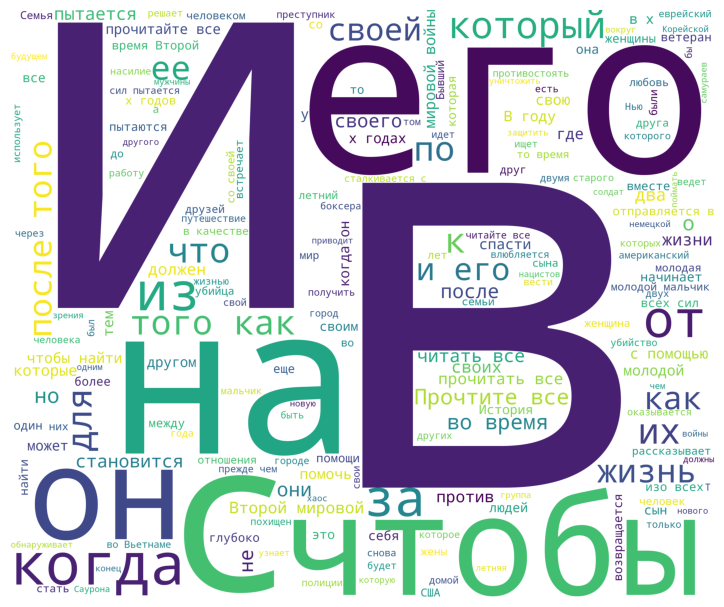

In [383]:
%%time
corpus = get_corpus(df_imdb['description'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

#### Общий текст после лемматизации

CPU times: total: 17.2 s
Wall time: 17.4 s


<Axes: >

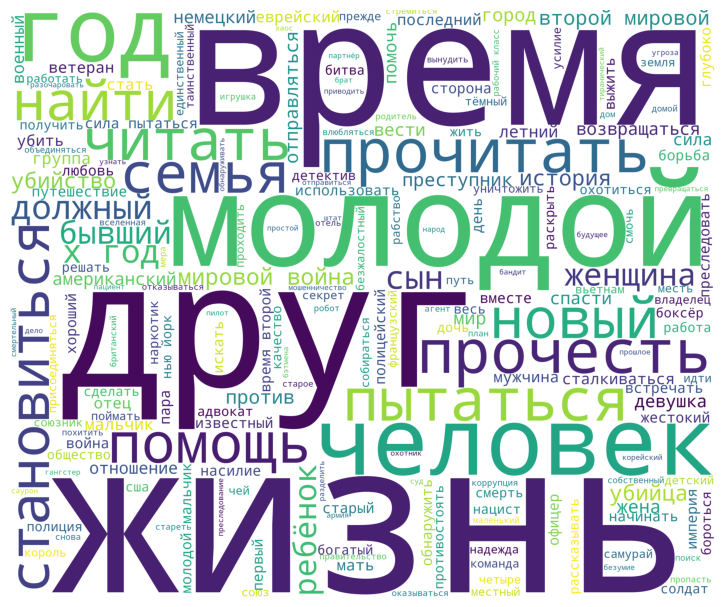

In [386]:
%%time
corpus = get_corpus(df_imdb['lemmatizing_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [387]:
df_imdb['lemmatizing_text'][1]

'старение патриарх организовать криминальный династия передавать контроль тайна империя неохотный сын'

#### Пример: первый фильм

CPU times: total: 3.89 s
Wall time: 3.91 s


<Axes: >

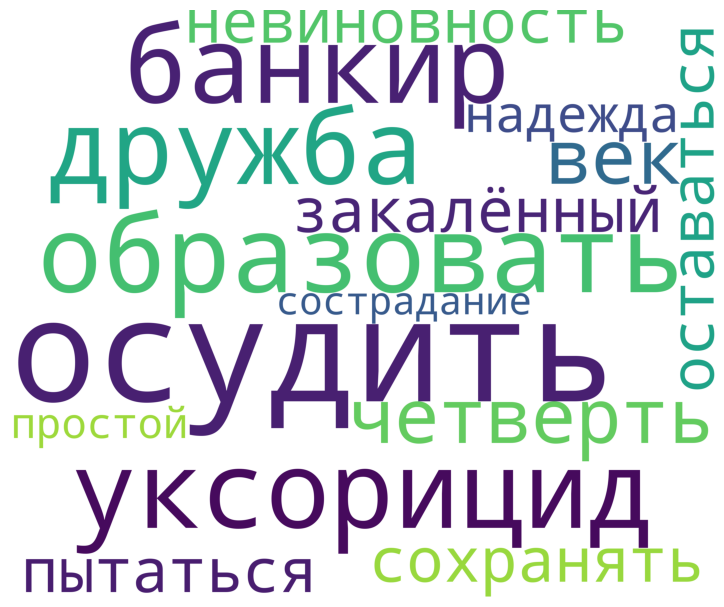

In [391]:
%%time
corpus = df_imdb['lemmatizing_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

#### Пример: второй фильм

CPU times: total: 5.33 s
Wall time: 5.37 s


<Axes: >

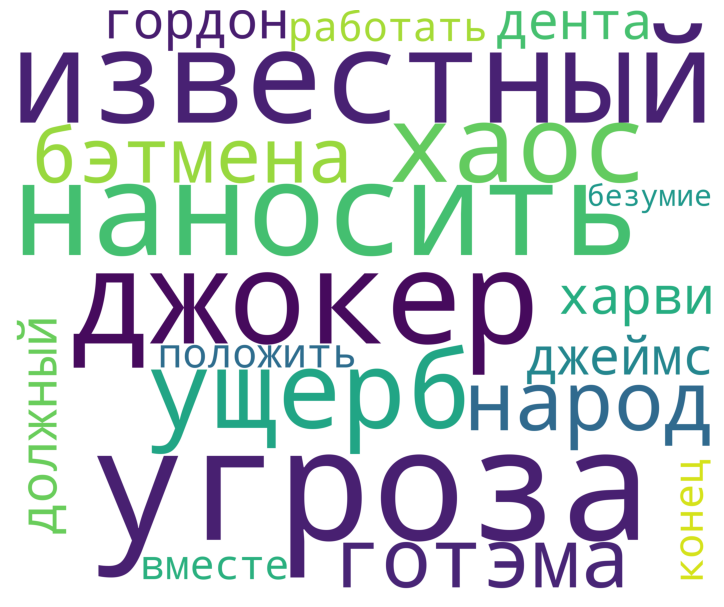

In [394]:
%%time
corpus = df_imdb['lemmatizing_text'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

#### Пример: третий фильм

CPU times: total: 4.64 s
Wall time: 4.64 s


<Axes: >

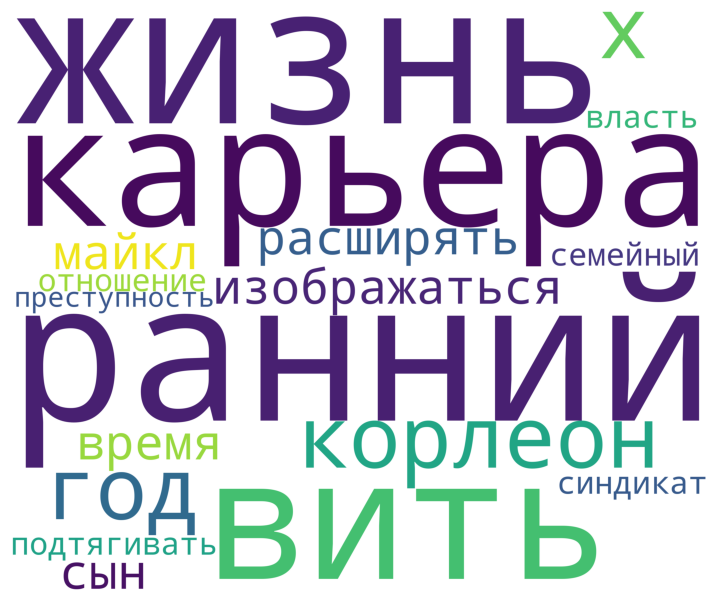

In [396]:
%%time
corpus = df_imdb['lemmatizing_text'][3]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

## Векторизация

In [399]:
df_imdb_v = pd.read_csv("all_data_parsing_data_imdb_lemmatizing_text.csv")
df_imdb_v.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  
0  банкир осудить уксорицид образовать дружба чет...  
1  старение патриарх организовать криминальный ди...  
2  угроза известный джокер наносить ущерб хаос на...  
3  ранний жизнь карьера вить корлеон х год изобра...  
4  присяжный суд дело убийство нью йорк разочаров...

In [401]:
for col in df_imdb_v.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df_imdb_v[col].isna().sum()))

Кол-во пропусков в колонке name = 0
Кол-во пропусков в колонке year = 0
Кол-во пропусков в колонке duration = 0
Кол-во пропусков в колонке description = 0
Кол-во пропусков в колонке genre = 0
Кол-во пропусков в колонке country = 0
Кол-во пропусков в колонке dont_number_text = 0
Кол-во пропусков в колонке lower_case = 0
Кол-во пропусков в колонке punctuation_text = 0
Кол-во пропусков в колонке remove_latin_text = 0
Кол-во пропусков в колонке stopwords_russian = 0
Кол-во пропусков в колонке stemmer_text = 0
Кол-во пропусков в колонке lemmatizing_text = 0


### Bag of words - Мешок слов

In [408]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(text for text in [
    'т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой', 
    'такой', 'другой', 'поэтому', 'также', 'например', 'мочь', 'почему', 'которой', 'которому', 'которому',
    'работа', 'работать', 'человек', 'время','который',
    'компания', 'делать', 'сделать', 'просто'])

In [404]:
from sklearn.feature_extraction.text import CountVectorizer

In [412]:
%%time
count_vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_vectorizer

CPU times: total: 0 ns
Wall time: 0 ns


CountVectorizer(min_df=2, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [428]:
count_matrix = count_vectorizer.fit_transform(df_imdb_v['lemmatizing_text'])

In [429]:
count_matrix.shape

(250, 686)

In [422]:
len(count_vectorizer.vocabulary_)

686

In [434]:
count_vectorizer.get_feature_names_out()[10:250]

array(['анджелес', 'аристократ', 'армия', 'артур', 'атака',
       'афроамериканский', 'банда', 'бандит', 'бездомный', 'безжалостный',
       'безумие', 'битва', 'близкий', 'бог', 'богатый', 'боевой', 'боец',
       'боксёр', 'больной', 'больной мать', 'бомба', 'бороться', 'борьба',
       'брат', 'британский', 'британский адвокат', 'бродвей', 'бродяга',
       'бросить', 'брюс', 'брюс уэйн', 'будущее', 'бывший', 'быстро',
       'бэтмена', 'вдова', 'ведьма', 'век', 'вена', 'вернуться', 'вести',
       'вести тихий', 'весь', 'весь жизнь', 'ветеран',
       'ветеран корейский', 'ветеран корейский война', 'вечеринка',
       'взять', 'виновник', 'включая', 'владелец', 'власть', 'влиять',
       'влюбиться', 'влюбляться', 'вместе', 'внук', 'военнопленный',
       'военный', 'возвращаться', 'возвращаться домой', 'воин', 'война',
       'война вьетнам', 'вокруг', 'волшебник', 'волшебный', 'вор',
       'воробей', 'воспоминание', 'восстановить', 'восточный', 'вражда',
       'вселенная', 'вс

In [452]:
count_vectorizer.get_feature_names_out()[120]

'давать'

In [454]:
print(count_matrix)

  (0, 337)	1
  (0, 47)	1
  (0, 484)	1
  (0, 292)	1
  (0, 466)	1
  (0, 568)	1
  (1, 382)	1
  (1, 195)	1
  (1, 606)	1
  (2, 631)	1
  (2, 189)	1
  (2, 657)	1
  (2, 300)	1
  (2, 116)	1
  (2, 44)	1
  (2, 132)	1
  (2, 138)	1
  (2, 66)	1
  (2, 404)	1
  (2, 227)	1
  (2, 20)	1
  (2, 405)	1
  (3, 606)	1
  (3, 155)	1
  (3, 215)	1
  :	:
  (247, 498)	1
  (247, 305)	1
  (247, 485)	1
  (247, 26)	1
  (247, 553)	1
  (248, 151)	2
  (248, 327)	1
  (248, 11)	1
  (248, 152)	1
  (248, 454)	1
  (248, 187)	1
  (248, 381)	1
  (248, 160)	1
  (248, 515)	1
  (249, 484)	1
  (249, 589)	1
  (249, 573)	1
  (249, 624)	1
  (249, 486)	1
  (249, 536)	1
  (249, 437)	1
  (249, 625)	1
  (249, 267)	1
  (249, 557)	1
  (249, 168)	1


### TF-IDF

In [460]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [587]:
tfidf_vectorizer_model = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [588]:
%%time
tfidf_matrix_model = tfidf_vectorizer_model.fit_transform(df_imdb_v['lemmatizing_text'])

CPU times: total: 31.2 ms
Wall time: 33 ms


In [590]:
tfidf_matrix_model.shape

(250, 297)

In [593]:
tfidf_vectorizer_model.get_feature_names_out()[10:250]

array(['битва', 'бог', 'богатый', 'боец', 'боксёр', 'бороться', 'борьба',
       'брат', 'британский', 'бродяга', 'будущее', 'бывший', 'бэтмена',
       'век', 'вернуться', 'вести', 'весь', 'ветеран', 'взять',
       'владелец', 'влюбляться', 'вместе', 'военный', 'возвращаться',
       'воин', 'война', 'вокруг', 'волшебный', 'восстановить',
       'вселенная', 'вскоре', 'встречать', 'второй', 'второй мировой',
       'второй мировой война', 'выжить', 'выйти', 'вынудить', 'высокий',
       'вьетнам', 'гангстер', 'глубоко', 'го', 'го век', 'год', 'город',
       'гражданский', 'группа', 'девочка', 'девушка', 'дело', 'день',
       'детектив', 'детский', 'джон', 'должный', 'дом', 'домой', 'дочь',
       'друг', 'друг друг', 'дух', 'еврейский', 'единственный', 'жена',
       'женщина', 'жертва', 'жестокий', 'жизнь', 'жить', 'запад',
       'заставить', 'защитить', 'защищать', 'звезда', 'земля', 'знать',
       'зрение', 'игрушка', 'идти', 'известный', 'иметь', 'империя',
       'имя', 'ирл

In [594]:
tfidf_vectorizer_model.get_feature_names_out()[296]

'являться'

In [597]:
print(tfidf_matrix_model)

  (0, 206)	0.5600914647958463
  (0, 134)	0.535772153255226
  (0, 215)	0.3648164658932055
  (0, 23)	0.5159018289096228
  (1, 269)	0.6541347288611777
  (1, 92)	0.7563780513061662
  (2, 186)	0.31584587596876623
  (2, 9)	0.31584587596876623
  (2, 104)	0.2909265277328268
  (2, 185)	0.31584587596876623
  (2, 31)	0.2909265277328268
  (2, 65)	0.23064606160385137
  (2, 22)	0.31584587596876623
  (2, 138)	0.31584587596876623
  (2, 288)	0.31584587596876623
  (2, 90)	0.2814526312258121
  (2, 281)	0.31584587596876623
  (3, 165)	0.6100070768454408
  (3, 54)	0.4155810569475921
  (3, 78)	0.3998835884429468
  (3, 269)	0.5433938415171768
  (4, 151)	0.32628598328724334
  (4, 196)	0.3388531190367802
  (4, 290)	0.3388531190367802
  (4, 223)	0.3542340501252998
  :	:
  (246, 275)	0.4030782535017156
  (246, 87)	0.4030782535017156
  (246, 274)	0.4030782535017156
  (246, 54)	0.23756846461307998
  (247, 13)	0.37589825599690424
  (247, 141)	0.37589825599690424
  (247, 224)	0.37589825599690424
  (247, 114)	0.334965

## Кластeризация

In [600]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [602]:
X = tfidf_matrix_model
# X = X.toarray()

### KMeans

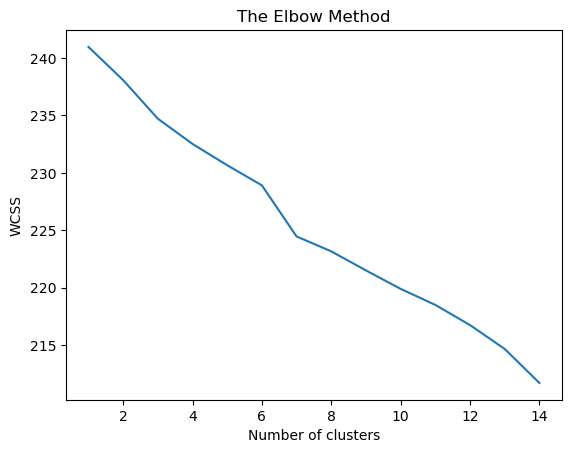

CPU times: total: 5.8 s
Wall time: 1.57 s


In [1054]:
%%time
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [1285]:
num_clusters = 8

In [1287]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [1288]:
pred=kmeans.fit_predict(X)

In [1290]:
labels=kmeans.labels_
print(labels)

[3 6 0 1 7 0 2 0 0 5 1 0 0 5 3 5 1 0 6 0 7 0 1 7 6 0 6 6 5 1 1 2 6 1 0 5 2
 3 4 4 4 0 1 5 6 0 4 4 4 0 7 1 0 0 7 6 0 0 7 1 0 1 0 7 5 5 3 0 0 2 0 1 4 0
 0 0 0 6 7 2 0 4 4 6 3 0 6 1 3 2 3 4 3 6 3 3 0 0 0 0 2 3 7 7 0 3 1 1 2 6 4
 0 1 5 2 7 0 4 0 6 5 0 7 6 2 6 7 5 0 6 6 1 7 6 4 1 0 5 3 4 1 0 4 6 4 3 0 0
 1 4 1 0 4 3 6 2 0 4 0 7 1 7 5 7 7 0 6 4 4 1 7 5 3 7 0 0 6 0 0 1 0 0 5 3 0
 5 7 4 6 0 0 2 4 4 5 5 4 0 0 4 0 0 1 2 4 4 5 1 1 0 5 3 0 5 1 0 0 6 4 0 6 4
 5 0 2 3 2 4 7 4 0 4 3 1 4 0 5 1 0 4 0 5 0 1 0 6 1 1 4 1]


In [1291]:
df_imdb_v['kmeans_cluster'] = pd.Series(labels)
df_imdb_v.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  kmeans_cluster  
0  банкир осудить уксорицид образовать дружба чет...               3  
1  старение патриарх организовать криминальный ди...               6  
2  угроза известный джокер наносить ущерб хаос на...               0  
3  ранний жизнь карьера вить корлеон х год изобра...               1  
4  присяжный суд дело убийство нью йорк разочаров...               7

kmeans_cluster
0    72
4    36
1    34
6    27
5    24
7    22
3    20
2    15
Name: count, dtype: int64


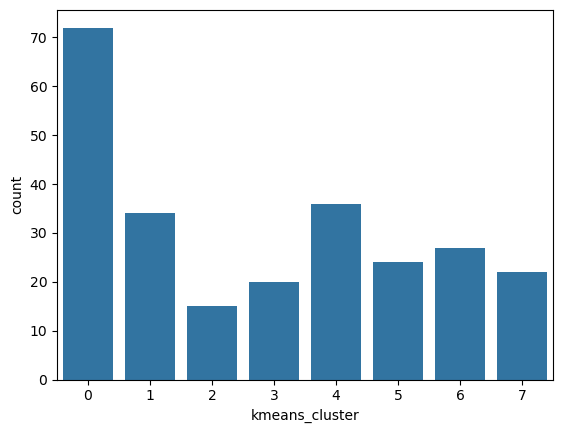

In [1292]:
# Смотрим распределение по кластерам
print(df_imdb_v['kmeans_cluster'].value_counts())
sns.countplot(x='kmeans_cluster', data=df_imdb_v)
plt.show()

### Рисование облака слов по кластерам - облачная кластеризация

In [1321]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [1322]:
# Получение текстовой строки из списка слов
def str_corpus_clustering(corpus):
    str_corpus = ''
    try:
        for i in corpus:
            str_corpus += ' ' + i
        str_corpus = str_corpus.strip()
    except:
        pass
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus_clustering(data):
    corpus = []
    try:
        for phrase in data:
            for word in phrase.split():
                corpus.append(word)
    except:
        pass
    return corpus

In [1323]:
def get_wordCloud_kmeans_clustering(cluster):
    df_v_cluster = df_imdb_v[df_imdb_v['kmeans_cluster'] == cluster]
    corpus = get_corpus_clustering(df_v_cluster['lemmatizing_text'].values)
    
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus_clustering(corpus))
    return wordCloud

In [1324]:
def wordCloud_kmeans_cluster():
    for i in range(df_imdb_v['kmeans_cluster'].nunique()):
        print(f'KMeans cluster: {i}')
        wordCloud_cluster = get_wordCloud_kmeans_clustering(i)
        fig = plt.figure(figsize=(15, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(wordCloud_cluster)
        plt.axis('off')
        plt.show()
        print(f'\n\n')
        # plt.subplot(1, 2, 1)

KMeans cluster: 0


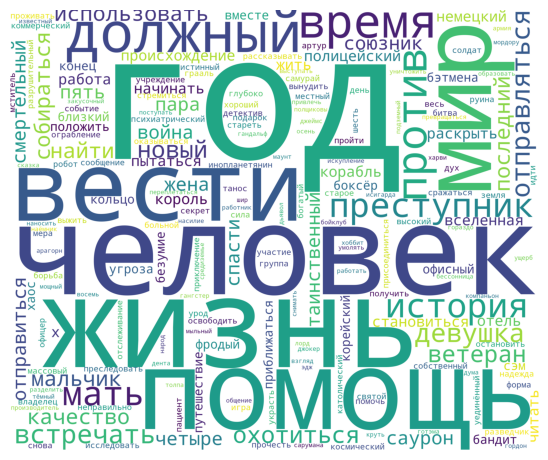




KMeans cluster: 1


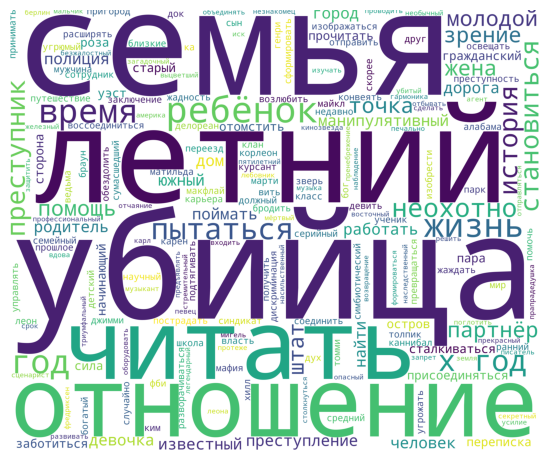




KMeans cluster: 2


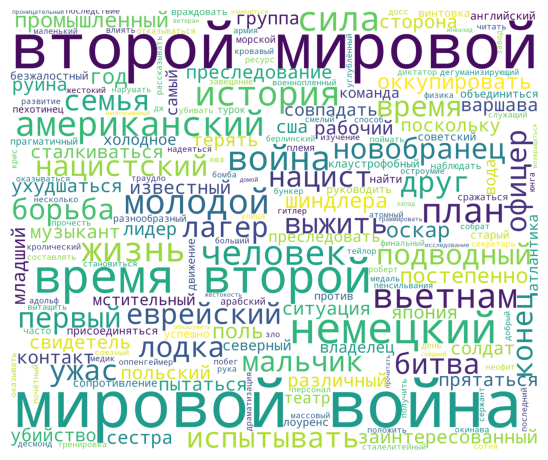




KMeans cluster: 3


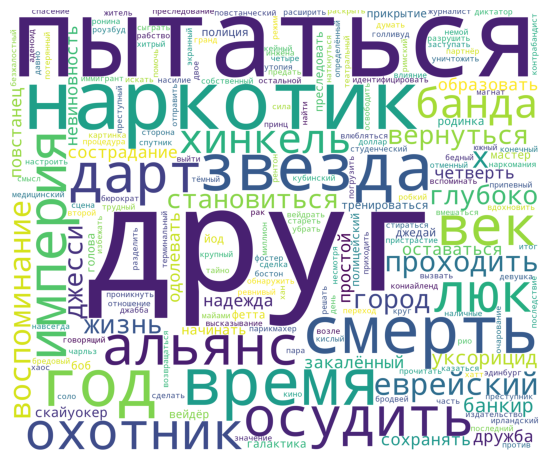




KMeans cluster: 4


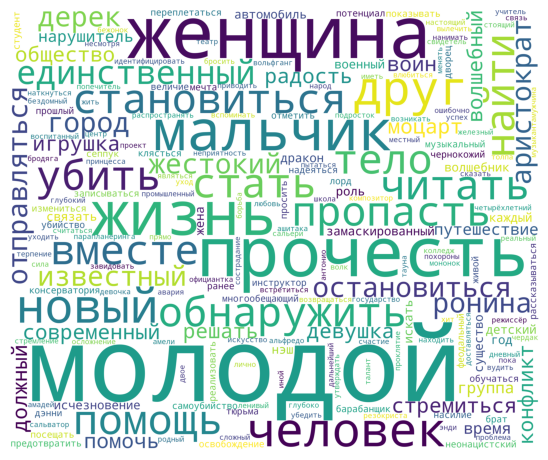




KMeans cluster: 5


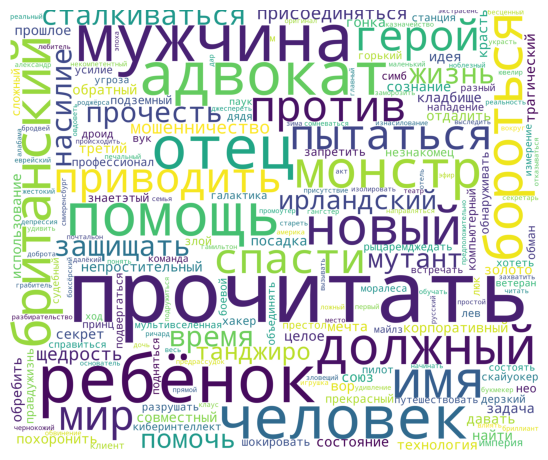




KMeans cluster: 6


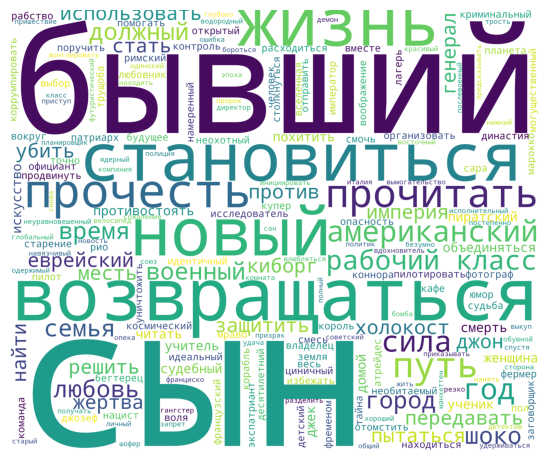




KMeans cluster: 7


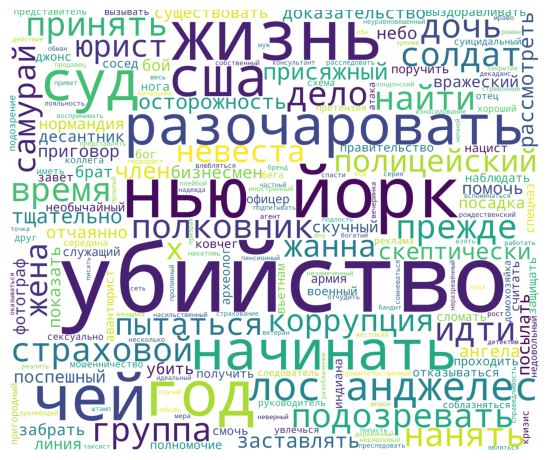




CPU times: total: 2min 31s
Wall time: 2min 33s


In [1328]:
%%time
wordCloud_kmeans_cluster()

### Добавление названия к кластерам

Из облака слов каждого кластера, были выбраны ключевые слова, описывающие данный кластер.

0) Жизнь человека
1) Семейные преступления
2) Вторая мировая война
3) Империя и власть
4) Молодость
5) Расследование преступлений
6) Новая жизнь 
7) Убийство

In [1337]:
dt_kmeans_name = { 
    0: 'Жизнь человека', 
    1: 'Семейные преступления', 
    2: 'Вторая мировая война',
    3: 'Империя и власть',
    4: 'Молодость',
    5: 'Расследование преступлений',
    6: 'Новая жизнь',
    7: 'Убийство'
}

In [1339]:
dt_kmeans_name

{0: 'Жизнь человека',
 1: 'Семейные преступления',
 2: 'Вторая мировая война',
 3: 'Империя и власть',
 4: 'Молодость',
 5: 'Расследование преступлений',
 6: 'Новая жизнь',
 7: 'Убийство'}

In [1342]:
df_imdb_v['kmeans_cluster_name'] = df_imdb_v['kmeans_cluster'].map(dt_kmeans_name)
df_imdb_v.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  kmeans_cluster  \
0  банкир осудить уксорицид образовать дружба чет...               3   
1  старение патриарх организовать криминальный ди...               6   
2  угроза известный джокер наносить ущерб хаос на...               0   
3  ранний жизнь карьера вить корлеон х год изобра...               1   
4  присяжный суд дело убийство нью йорк разочаров...               7   

     kmeans_cluster_name  
0       Империя и власть  
1            Новая жизнь  
2         Жизнь человека  
3  Семейные преступления  
4               Убийство

##### Сохраняем данные в файл для дальнейшей удобной работы

In [1344]:
file_name = 'imdb_parsing_name_cluster.csv'
df_imdb_v.to_csv(file_name, index=False)

## Тематическое моделирование

In [6]:
import gensim

In [7]:
df_imdb_t=pd.read_csv("imdb_parsing_name_cluster.csv")
df_imdb_t.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  kmeans_cluster  \
0  банкир осудить уксорицид образовать дружба чет...               3   
1  старение патриарх организовать криминальный ди...               6   
2  угроза известный джокер наносить ущерб хаос на...               0   
3  ранний жизнь карьера вить корлеон х год изобра...               1   
4  присяжный суд дело убийство нью йорк разочаров...               7   

     kmeans_cluster_name  
0       Империя и власть  
1            Новая жизнь  
2         Жизнь человека  
3  Семейные преступления  
4               Убийство

#### Просмотр тем с помощью графика LDA

In [11]:
def tokenize_test(text):
    tokens = word_tokenize(text)
    return tokens

In [13]:
%%time
# df_imdb_t['tokenize_lemmatizing_text'] = [tokenize_test(text) for text in df_imdb_t['lemmatizing_recurring_text']]
df_imdb_t['tokenize_lemmatizing_text'] = [tokenize_test(text) for text in df_imdb_t['lemmatizing_text']]
df_imdb_t.head()

CPU times: total: 15.6 ms
Wall time: 25 ms


name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  kmeans_cluster  \
0  банкир осудить уксорицид образовать дружба чет...               3   
1  старение патриарх организовать криминальный ди...               6   
2  угроза известный джокер наносить ущерб хаос на...               0   
3  ранний жизнь карьера вить корлеон х год изобра...               1   
4  присяжный суд дело убийство нью йорк разочаров...               7   

     kmeans_cluster_name                          tokenize_lemmatizing_text  
0       Империя и власть  [банкир, осудить, уксорицид, образовать, дружб...  
1            Новая жизнь  [старение, патриарх, организовать, криминальны...  
2         Жизнь человека  [угроза, известный, джокер, наносить, ущерб, х...  
3  Семейные преступления  [ранний, жизнь, карьера, вить, корлеон, х, год...  
4               Убийство  [присяжный, суд, дело, убийство, нью, йорк, ра...

In [15]:
%%time
gensim_dictionary = gensim.corpora.Dictionary(df_imdb_t['tokenize_lemmatizing_text'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

CPU times: total: 15.6 ms
Wall time: 6 ms


In [17]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df_imdb_t['tokenize_lemmatizing_text']]

In [19]:
len(corpus)

250

In [21]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [22]:
%%time
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

CPU times: total: 3.11 s
Wall time: 4.59 s


In [23]:
lda_20.print_topics()

[(0,
  '0.331*"пытаться" + 0.225*"прочитать" + 0.222*"человек" + 0.222*"прочесть"'),
 (1,
  '0.970*"человек" + 0.013*"прочитать" + 0.009*"прочесть" + 0.008*"пытаться"'),
 (2,
  '0.968*"прочитать" + 0.012*"человек" + 0.011*"прочесть" + 0.010*"пытаться"'),
 (3,
  '0.971*"прочесть" + 0.010*"пытаться" + 0.010*"прочитать" + 0.010*"человек"'),
 (4,
  '0.976*"пытаться" + 0.008*"человек" + 0.008*"прочитать" + 0.008*"прочесть"')]

In [24]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [25]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [26]:
pyLDAvis.enable_notebook()

In [27]:
%%time
vis_20

CPU times: total: 0 ns
Wall time: 0 ns


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.199223  0.184571       1        1  24.514541
4     -0.369748  0.094572       2        1  24.319353
2      0.159288  0.093104       3        1  21.139473
3      0.043076 -0.380233       4        1  20.859645
0     -0.031840  0.007985       5        1   9.166988, topic_info=        Term       Freq      Total Category  logprob  loglift
0   пытаться  24.000000  24.000000  Default   4.0000   4.0000
1    человек  23.000000  23.000000  Default   3.0000   3.0000
3   прочесть  20.000000  20.000000  Default   2.0000   2.0000
2  прочитать  20.000000  20.000000  Default   1.0000   1.0000
1    человек  21.160888  23.561163   Topic1  -0.0306   1.2985
2  прочитать   0.277553  20.664935   Topic1  -4.3645  -2.9043
3   прочесть   0.203271  20.402397   Topic1  -4.6760  -3.2030
0   пытаться   0.176229  24.371505   Topic1  -4.8187  -3.5235
0   пытаться  21.125438  24.371505   Topic2  -0.0243   1.2710
3   прочесть   0.168977  20.402397   Topic2  -4.8527  -3.3797
2  прочитать   0.169122  20.664935   Topic2  -4.8519  -3.3917
1    человек   0.180686  23.561163   Topic2  -4.7857  -3.4567
2  прочитать  18.203047  20.664935   Topic3  -0.0330   1.4272
3   прочесть   0.201453  20.402397   Topic3  -4.5368  -3.0638
1    человек   0.227422  23.561163   Topic3  -4.4156  -3.0865
0   пытаться   0.182210  24.371505   Topic3  -4.6372  -3.3420
3   прочесть  18.018211  20.402397   Topic4  -0.0299   1.4431
2  прочитать   0.183388  20.664935   Topic4  -4.6174  -3.1572
1    человек   0.180035  23.561163   Topic4  -4.6359  -3.3069
0   пытаться   0.183451  24.371505   Topic4  -4.6171  -3.3219
0   пытаться   2.704177  24.371505   Topic5  -1.1043   0.1909
3   прочесть   1.810485  20.402397   Topic5  -1.5055  -0.0325
2  прочитать   1.831825  20.664935   Topic5  -1.4938  -0.0336
1    человек   1.812133  23.561163   Topic5  -1.5046  -0.1755, token_table=      Topic      Freq       Term
term                            
3         4  0.882249   прочесть
3         5  0.098028   прочесть
2         3  0.871041  прочитать
2         5  0.096782  прочитать
0         2  0.861662   пытаться
0         5  0.123095   пытаться
1         1  0.891297    человек
1         5  0.084885    человек, R=4, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [28]:
%%time
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df_imdb_t['tokenize_lemmatizing_text'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.2944952401513932
CPU times: total: 62.5 ms
Wall time: 3.63 s


In [29]:
# 1) 0.2944952401513932
# 2) 0.29449524015139317

### Предпоготовка данных

In [31]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(text for text in [
    'т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой', 
    'такой', 'другой', 'поэтому', 'также', 'например', 'мочь', 'почему', 'которой', 'которому', 'которому',
    'работа', 'работать', 'человек', 'время','который',
    'компания', 'делать', 'сделать', 'просто'])

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
%%time
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
vectorizer

CPU times: total: 0 ns
Wall time: 0 ns


CountVectorizer(min_df=2, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [34]:
count_matrix = vectorizer.fit_transform(df_imdb_t['lemmatizing_text'])

In [35]:
count_matrix.shape

(250, 686)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000,
                                   min_df=0.01,
                                   max_df=0.8,
                                   stop_words=russian_stopwords,
                                   ngram_range=(1,3))
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=10000, min_df=0.01, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [1408]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df_imdb_t['lemmatizing_text'])

CPU times: total: 31.2 ms
Wall time: 34 ms


In [1410]:
tfidf_matrix.shape

(250, 297)

In [1412]:
### TF-IDF
tfidf_vectorizer_m = TfidfVectorizer()
tfidf_vectorizer_m

TfidfVectorizer()

In [1416]:
tfidf_matrix_m = tfidf_vectorizer_m.fit_transform(df_imdb_t['lemmatizing_text'])
tfidf_matrix_m.shape

(250, 2105)

#### Создание словарей для тематического моделирования

In [73]:
def count_martix_vectorization(cluster):
    content = df_imdb_t[df_imdb_t['kmeans_cluster'] == cluster]
    count_matrix = vectorizer.fit_transform(content['lemmatizing_text'])
    return count_matrix

In [81]:
def kmeans_cluster_count_vectorization():
    for i in range(df_imdb_t['kmeans_cluster'].nunique()):
        print(f'AgglomerativeClustering cluster: {i}')
        count_martix_f = count_martix_vectorization(i)
        
        print(f'Размерность: {count_martix_f.shape}\n')
        dt_kmeans_count_vectorizer[i] = [count_martix_f]

In [83]:
dt_kmeans_count_vectorizer = dict()
dt_kmeans_count_vectorizer

{}

In [85]:
%%time
kmeans_cluster_count_vectorization()

AgglomerativeClustering cluster: 0
Размерность: (72, 145)

AgglomerativeClustering cluster: 1
Размерность: (34, 46)

AgglomerativeClustering cluster: 2
Размерность: (15, 34)

AgglomerativeClustering cluster: 3
Размерность: (20, 21)

AgglomerativeClustering cluster: 4
Размерность: (36, 51)

AgglomerativeClustering cluster: 5
Размерность: (24, 23)

AgglomerativeClustering cluster: 6
Размерность: (27, 45)

AgglomerativeClustering cluster: 7
Размерность: (22, 33)

CPU times: total: 15.6 ms
Wall time: 22 ms


In [87]:
dt_kmeans_count_vectorizer

{0: [<72x145 sparse matrix of type '<class 'numpy.int64'>'
  	with 382 stored elements in Compressed Sparse Row format>],
 1: [<34x46 sparse matrix of type '<class 'numpy.int64'>'
  	with 136 stored elements in Compressed Sparse Row format>],
 2: [<15x34 sparse matrix of type '<class 'numpy.int64'>'
  	with 135 stored elements in Compressed Sparse Row format>],
 3: [<20x21 sparse matrix of type '<class 'numpy.int64'>'
  	with 64 stored elements in Compressed Sparse Row format>],
 4: [<36x51 sparse matrix of type '<class 'numpy.int64'>'
  	with 164 stored elements in Compressed Sparse Row format>],
 5: [<24x23 sparse matrix of type '<class 'numpy.int64'>'
  	with 67 stored elements in Compressed Sparse Row format>],
 6: [<27x45 sparse matrix of type '<class 'numpy.int64'>'
  	with 139 stored elements in Compressed Sparse Row format>],
 7: [<22x33 sparse matrix of type '<class 'numpy.int64'>'
  	with 96 stored elements in Compressed Sparse Row format>]}

In [57]:
def tfidf_martix_vectorization(cluster):
    content = df_imdb_t[df_imdb_t['kmeans_cluster'] == cluster]
    tfidf_matrix = tfidf_vectorizer.fit_transform(content['lemmatizing_text'])
    return tfidf_matrix

In [63]:
def kmeans_cluster_tfidf_vectorization():
    for i in range(df_imdb_t['kmeans_cluster'].nunique()):
        print(f'AgglomerativeClustering cluster: {i}')
        tfidf_martix_f = tfidf_martix_vectorization(i)
        
        print(f'Размерность: {tfidf_martix_f.shape}\n')
        dt_kmeans_tfidf_vectorizer[i] = [tfidf_martix_f]

In [55]:
dt_kmeans_tfidf_vectorizer = dict()
dt_kmeans_tfidf_vectorizer

{}

In [67]:
kmeans_cluster_tfidf_vectorization()

AgglomerativeClustering cluster: 0
Размерность: (72, 2563)

AgglomerativeClustering cluster: 1
Размерность: (34, 1329)

AgglomerativeClustering cluster: 2
Размерность: (15, 638)

AgglomerativeClustering cluster: 3
Размерность: (20, 769)

AgglomerativeClustering cluster: 4
Размерность: (36, 1447)

AgglomerativeClustering cluster: 5
Размерность: (24, 1027)

AgglomerativeClustering cluster: 6
Размерность: (27, 1147)

AgglomerativeClustering cluster: 7
Размерность: (22, 763)



In [71]:
dt_kmeans_tfidf_vectorizer

{0: [<72x2563 sparse matrix of type '<class 'numpy.float64'>'
  	with 2800 stored elements in Compressed Sparse Row format>],
 1: [<34x1329 sparse matrix of type '<class 'numpy.float64'>'
  	with 1419 stored elements in Compressed Sparse Row format>],
 2: [<15x638 sparse matrix of type '<class 'numpy.float64'>'
  	with 725 stored elements in Compressed Sparse Row format>],
 3: [<20x769 sparse matrix of type '<class 'numpy.float64'>'
  	with 812 stored elements in Compressed Sparse Row format>],
 4: [<36x1447 sparse matrix of type '<class 'numpy.float64'>'
  	with 1560 stored elements in Compressed Sparse Row format>],
 5: [<24x1027 sparse matrix of type '<class 'numpy.float64'>'
  	with 1071 stored elements in Compressed Sparse Row format>],
 6: [<27x1147 sparse matrix of type '<class 'numpy.float64'>'
  	with 1241 stored elements in Compressed Sparse Row format>],
 7: [<22x763 sparse matrix of type '<class 'numpy.float64'>'
  	with 826 stored elements in Compressed Sparse Row format>]

### LDA - Latent Dirichlet allocation

In [89]:
import random

In [91]:
from sklearn.decomposition import LatentDirichletAllocation

In [105]:
def lda_model_dt(matrix):
    lda_model = LatentDirichletAllocation(n_components=6, random_state=0)
    lda_model.fit(matrix)
    
    # вывод топ слов для каждого кластера
    for i, topic in enumerate(lda_model.components_):
        text = ''
        for j in topic.argsort()[:-5:-1]:
            if j >= len(vectorizer.get_feature_names_out()):
                rnd = random.randint(0, len(vectorizer.get_feature_names_out()) - 1)
                text += f' {vectorizer.get_feature_names_out()[rnd]}'
                continue
            text += f' {vectorizer.get_feature_names_out()[j]}'
        print(f'    Тема {i}: {text}')

In [107]:
for i in range(len(dt_kmeans_count_vectorizer)):
    print(f'Кластер {i}: ')
    lda_model_dt(*dt_kmeans_count_vectorizer[i])
    print('\n')

Кластер 0: 
    Тема 0:  чей юрист сша нанять
    Тема 1:  нанять подозревать нанять коррупция
    Тема 2:  пытаться пытаться подозревать сша
    Тема 3:  начинать чей принять начинать
    Тема 4:  солдат лос анджелес полковник найти
    Тема 5:  идти дочь пытаться коррупция


Кластер 1: 
    Тема 0:  анджелес дочь год идти
    Тема 1:  лос найти убийство анджелес
    Тема 2:  нью йорк чей жена принять
    Тема 3:  сша убийство начинать подозревать год лос анджелес
    Тема 4:  год лос анджелес солдат убийство принять
    Тема 5:  убийство лос коррупция нью йорк


Кластер 2: 
    Тема 0:  чей дело жена дочь
    Тема 1:  разочаровать суд дело жена
    Тема 2:  год лос анджелес полковник полицейский жена
    Тема 3:  год лос анджелес дело дочь жена
    Тема 4:  идти год лос анджелес группа солдат
    Тема 5:  год лос год лос анджелес нанять


Кластер 3: 
    Тема 0:  жизнь год лос лос анджелес анджелес
    Тема 1:  дочь нью жизнь начинать подозревать
    Тема 2:  нью лос коррупция нью йо

### NMF - Non-negative matrix factorization

In [113]:
from sklearn.decomposition import NMF

In [123]:
def nmf_model_dt(nmf_matrix):
    nmf_model = NMF(n_components=7, random_state=0)
    nmf_model.fit(nmf_matrix)
    
    # вывод топ слов для каждого кластера
    for i, topic in enumerate(nmf_model.components_):
        print(f'    Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-5:-1]])}')

In [125]:
for i in range(len(dt_kmeans_count_vectorizer)):
    print(f'Кластер {i}:')
    nmf_model_dt(*dt_kmeans_count_vectorizer[i])
    print('\n')

Кластер 0:
    Тема 0: анджелес полицейский проливный, армия сша, вершина ринг разрушить, вершина ринг
    Тема 1: богатый, ветеран ночной таксист, дочь поймать виновник, джонс найти ковчег
    Тема 2: бизнесмен показать, армия сша служащий, деревянный, группа солдат сша
    Тема 3: год, дарк, вечеринка накатомь плаз, домохозяйка схема
    Тема 4: взять террорист рождественский, военный суд отказываться, вершина, власть раскрыть
    Тема 5: вызов местный власть, вспоминаться, археолог авантюрист, бренд
    Тема 6: бандит невеста, вне, археолог, анджелес оказываться попасть


Кластер 1:
    Тема 0: авантюрист, брат, боксёр джейк ламотт, анджелес
    Тема 1: брат убить, атака, антебеллум соломон, антебеллум
    Тема 2: анджелес полицейский, анджелес полицейский проливный, агент, авантюрист
    Тема 3: армия сша служащий, ангела посылать, ангела посылать небо, бизнесмен показать
    Тема 4: бог, боксёр джейк, бега принять правительственный, бой
    Тема 5: брат убить бой, бизнесмен, богат

### LSA - Latent semantic analysis

In [136]:
from sklearn.decomposition import TruncatedSVD

In [138]:
def lsa_model_dt(lsa_matrix):
    lsa_model = TruncatedSVD(n_components=7, random_state=0)
    lsa_model.fit(lsa_matrix)
    
    # вывод топ слов для каждого кластера
    for i, topic in enumerate(lsa_model.components_):
        print(f'    Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-5:-1]])}')

In [140]:
for i in range(len(dt_kmeans_count_vectorizer)):
    print(f'Кластер {i}:')
    lsa_model_dt(*dt_kmeans_count_vectorizer[i])
    print('\n')

Кластер 0:
    Тема 0: бандит невеста, анджелес оказываться попасть, год, армия сша
    Тема 1: бандит невеста, анджелес полицейский проливный, армия сша, вершина ринг разрушить
    Тема 2: армия сша служащий, деревянный, вызов местный власть, джейк ламотт
    Тема 3: год, власть раскрыть, вечеринка накатомь плаз, дарк
    Тема 4: взять террорист рождественский, военный суд отказываться, вершина, вражеский
    Тема 5: вызов местный власть, бренд, вспоминаться, археолог авантюрист
    Тема 6: археолог, год, вызов местный власть, вершина


Кластер 1:
    Тема 0: авантюрист, анджелес полицейский, брат убить, бог
    Тема 1: авантюрист, анджелес, брат, боксёр джейк ламотт
    Тема 2: анджелес полицейский, агент, анджелес полицейский проливный, агент группа
    Тема 3: брат убить, авантюрист, атака, антебеллум соломон
    Тема 4: бог, боксёр джейк, бега принять правительственный, бой
    Тема 5: брат убить бой, бизнесмен, богатый неверный, богатый
    Тема 6: армия сша служащий, ангела посы

### Добавление названия к кластерам - после тематического моделирования

За основу взяты темы модели LSA. 

Для каждого кластера была построена модель тематического моделирования. Модель определила несколько тем для описания кластера. Были выбраны несколько слов из каждой темы и назван кластер с помощью тематического моделирования.

In [157]:
dt_kmeans_name_lsa = { 
    0: 'Бандитский криминал', 
    1: 'Криминал/боевик', 
    2: 'Побег',
    3: 'Исследование/приключение',
    4: 'Боевик',
    5: 'Военный фильм',
    6: 'Художественный фильм',
    7: 'Драма/история'
}

In [159]:
dt_kmeans_name_lsa

{0: 'Бандитский криминал',
 1: 'Криминал/боевик',
 2: 'Побег',
 3: 'Исследование/приключение',
 4: 'Боевик',
 5: 'Военный фильм',
 6: 'Художественный фильм',
 7: 'Драма/история'}

In [163]:
df_imdb_t['kmeans_lsa_name'] = df_imdb_t['kmeans_cluster'].map(dt_kmeans_name_lsa)
df_imdb_t.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  kmeans_cluster  \
0  банкир осудить уксорицид образовать дружба чет...               3   
1  старение патриарх организовать криминальный ди...               6   
2  угроза известный джокер наносить ущерб хаос на...               0   
3  ранний жизнь карьера вить корлеон х год изобра...               1   
4  присяжный суд дело убийство нью йорк разочаров...               7   

     kmeans_cluster_name                          tokenize_lemmatizing_text  \
0       Империя и власть  [банкир, осудить, уксорицид, образовать, дружб...   
1            Новая жизнь  [старение, патриарх, организовать, криминальны...   
2         Жизнь человека  [угроза, известный, джокер, наносить, ущерб, х...   
3  Семейные преступления  [ранний, жизнь, карьера, вить, корлеон, х, год...   
4               Убийство  [присяжный, суд, дело, убийство, нью, йорк, ра...   

            kmeans_lsa_name  
0  Исследование/приключение  
1 

In [165]:
file_name = 'imdb_parsing_name_cluster.csv'
df_imdb_t.to_csv(file_name, index=False)

## Классификация

In [479]:
df_imdb_t=pd.read_csv("imdb_parsing_name_cluster.csv")
df_imdb_t.head()

name  year duration  \
0       Побег из Шоушенка  1994   2h 22m   
1           Крестный отец  1972   2h 55m   
2           Тёмный рыцарь  2008   2h 32m   
3         Крестный отец 2  1974   3h 22m   
4  12 разгневанных мужчин  1957   1h 36m   

                                         description  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                               genre        country  \
0  ['Эпический', 'Период драма', 'Тюремная драма'...  United States   
1  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
2  ['Действие Эпик', 'Эпический', 'Супергерой', '...  United States   
3  ['Эпический', 'Гангстер', 'Трагедия', 'Преступ...  United States   
4  ['Юридическая драма', 'Психологическая драма',...  United States   

                                    dont_number_text  \
0  Банкир, осужденный за уксорицид, образует друж...   
1  Старение патриарха организованной криминальной...   
2  Когда угроза, известная как Джокер, наносит ущ...   
3  Ранняя жизнь и карьера Вито Корлеоне в  -х год...   
4  Присяжные в суде по делу об убийстве в Нью -Йо...   

                                          lower_case  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в  -х год...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                                    punctuation_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   remove_latin_text  \
0  банкир осужденный за уксорицид образует дружбу...   
1  старение патриарха организованной криминальной...   
2  когда угроза известная как джокер наносит ущер...   
3  ранняя жизнь и карьера вито корлеоне в  х года...   
4  присяжные в суде по делу об убийстве в нью йор...   

                                   stopwords_russian  \
0  банкир осужденный уксорицид образует дружбу че...   
1  старение патриарха организованной криминальной...   
2  угроза известная джокер наносит ущерб хаос нар...   
3  ранняя жизнь карьера вито корлеоне х годах изо...   
4  присяжные суде делу убийстве нью йорке разочар...   

                                        stemmer_text  \
0  банкир осужден уксорицид образ дружб четверт в...   
1  старен патриарх организова криминальн династ п...   
2  угроз известн джокер нанос ущерб хаос народ го...   
3  ран жизн карьер вит корлеон х год изобража вре...   
4  присяжн суд дел убийств нью йорк разочарова од...   

                                    lemmatizing_text  kmeans_cluster  \
0  банкир осудить уксорицид образовать дружба чет...               3   
1  старение патриарх организовать криминальный ди...               6   
2  угроза известный джокер наносить ущерб хаос на...               0   
3  ранний жизнь карьера вить корлеон х год изобра...               1   
4  присяжный суд дело убийство нью йорк разочаров...               7   

     kmeans_cluster_name                          tokenize_lemmatizing_text  \
0       Империя и власть  ['банкир', 'осудить', 'уксорицид', 'образовать...   
1            Новая жизнь  ['старение', 'патриарх', 'организовать', 'крим...   
2         Жизнь человека  ['угроза', 'известный', 'джокер', 'наносить', ...   
3  Семейные преступления  ['ранний', 'жизнь', 'карьера', 'вить', 'корлео...   
4               Убийство  ['присяжный', 'суд', 'дело', 'убийство', 'нью'...   

            kmeans_lsa_name  
0  Исследование/приключение  
1 

In [481]:
df_imdb_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       250 non-null    object
 1   year                       250 non-null    int64 
 2   duration                   250 non-null    object
 3   description                250 non-null    object
 4   genre                      250 non-null    object
 5   country                    250 non-null    object
 6   dont_number_text           250 non-null    object
 7   lower_case                 250 non-null    object
 8   punctuation_text           250 non-null    object
 9   remove_latin_text          250 non-null    object
 10  stopwords_russian          250 non-null    object
 11  stemmer_text               250 non-null    object
 12  lemmatizing_text           250 non-null    object
 13  kmeans_cluster             250 non-null    int64 
 14  kmeans_clu

In [483]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [485]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_imdb_t['lemmatizing_text'], df_imdb_t['kmeans_cluster'], 
                                                      test_size=0.3, 
                                                      random_state=0)

In [487]:
len(X_train)

175

In [489]:
len(X_test)

75

In [491]:
tfidf_model_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
X_train_tfidf = tfidf_model_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_model_vectorizer.transform(X_test)

In [493]:
X_train_tfidf

<175x6482 sparse matrix of type '<class 'numpy.float64'>'
	with 7559 stored elements in Compressed Sparse Row format>

In [495]:
X_test_tfidf

<75x6482 sparse matrix of type '<class 'numpy.float64'>'
	with 654 stored elements in Compressed Sparse Row format>

### RandomForestClassifier

In [498]:
%%time
model_rf = RandomForestClassifier()
model_rf.fit(X_train_tfidf, y_train)

CPU times: total: 297 ms
Wall time: 312 ms


RandomForestClassifier()

In [499]:
%%time
y_pred_rf = model_rf.predict(X_test_tfidf)

CPU times: total: 15.6 ms
Wall time: 9 ms


In [502]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.33      1.00      0.49        21
           1       0.00      0.00      0.00        11
           2       1.00      0.40      0.57         5
           3       0.00      0.00      0.00         5
           4       0.86      0.67      0.75         9
           5       1.00      0.20      0.33         5
           6       1.00      0.09      0.17        11
           7       0.00      0.00      0.00         8

    accuracy                           0.41        75
   macro avg       0.52      0.29      0.29        75
weighted avg       0.47      0.41      0.31        75



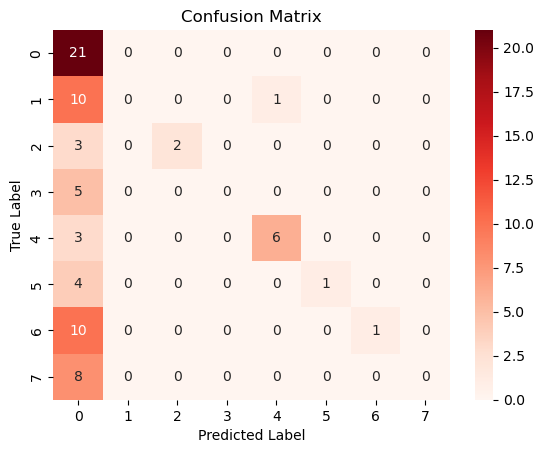

In [504]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### LogisticRegression

In [507]:
%%time
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

CPU times: total: 406 ms
Wall time: 101 ms


LogisticRegression()

In [509]:
%%time
y_pred_lr = model_lr.predict(X_test_tfidf)

CPU times: total: 0 ns
Wall time: 0 ns


In [511]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       1.00      0.22      0.36         9
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         8

    accuracy                           0.31        75
   macro avg       0.16      0.15      0.10        75
weighted avg       0.20      0.31      0.17        75



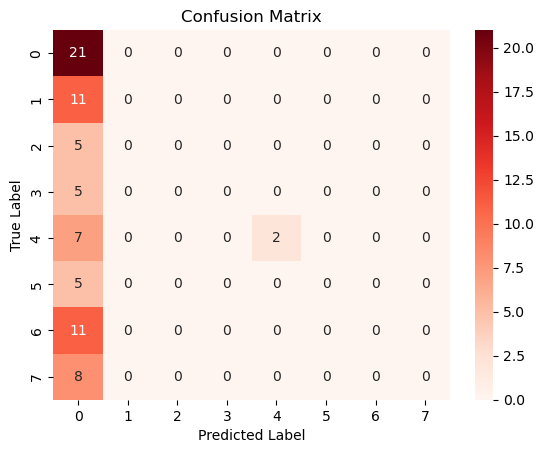

In [513]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### KNeighborsClassifier

In [516]:
%%time
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_tfidf, y_train)

CPU times: total: 0 ns
Wall time: 2 ms


KNeighborsClassifier()

In [518]:
%%time
y_pred_knn = model_knn.predict(X_test_tfidf)

CPU times: total: 0 ns
Wall time: 1.97 ms


In [520]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.46      0.57      0.51        21
           1       0.53      0.73      0.62        11
           2       0.33      0.40      0.36         5
           3       1.00      0.60      0.75         5
           4       0.44      0.44      0.44         9
           5       0.67      0.40      0.50         5
           6       1.00      0.45      0.62        11
           7       0.38      0.38      0.38         8

    accuracy                           0.52        75
   macro avg       0.60      0.50      0.52        75
weighted avg       0.58      0.52      0.53        75



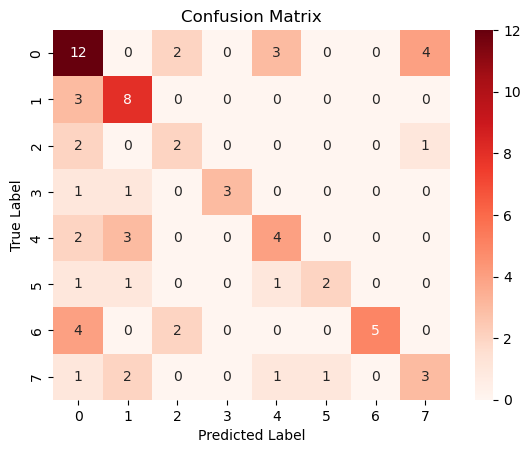

In [522]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Сравнение метрик каждой модели

In [525]:
print('Random Forest \n' + classification_report(y_test, y_pred_rf))
print('-' * 53)
print('Logistic Regression \n' + classification_report(y_test, y_pred_lr))
print('-' * 53)
print('KNeighborsClassifier \n' + classification_report(y_test, y_pred_knn))

Random Forest 
              precision    recall  f1-score   support

           0       0.33      1.00      0.49        21
           1       0.00      0.00      0.00        11
           2       1.00      0.40      0.57         5
           3       0.00      0.00      0.00         5
           4       0.86      0.67      0.75         9
           5       1.00      0.20      0.33         5
           6       1.00      0.09      0.17        11
           7       0.00      0.00      0.00         8

    accuracy                           0.41        75
   macro avg       0.52      0.29      0.29        75
weighted avg       0.47      0.41      0.31        75

-----------------------------------------------------
Logistic Regression 
              precision    recall  f1-score   support

           0       0.29      1.00      0.45        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.0

Было построено 3 модели классификации
* Random Forest
* Logistic Regression
* KNeighborsClassifier

Самый лучший результат среди других моделей в метрике F1-Score показа модель **KNeighborsClassifier**.
Показетели модели в метрике F1-Score у модели **KNeighborsClassifier** - **0.52**.

Остальные модели показли наименее лучший результат. Скорее всего это связанно с небольшим количеством данных взятых для обучения.

В общей сложности модели показали себя не очень удовлетворительно.
Поэтому для дальнейшей работы была выбрана самая лучшая модель **KNeighborsClassifier**.

## Сохранение модели

In [542]:
import pickle

In [544]:
model_knn

KNeighborsClassifier()

In [546]:
tfidf_model_vectorizer

TfidfVectorizer(max_features=10000, ngram_range=(1, 3))

In [548]:
# Сохранение модели
with open('tfidf_model_vectorizer_kino_v1.pkl', 'wb') as file:
    pickle.dump(tfidf_model_vectorizer, file)

In [550]:
# Сохранение модели
with open('model_lr_kino_v1.pkl', 'wb') as file:
    pickle.dump(model_knn, file)